In [ ]:
# ML Midsem Question 4: Neural Network
#10190900042

In [ ]:
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [ ]:
x,y = make_classification(n_samples=100000, n_features=2, n_classes=4, n_clusters_per_class=1, n_redundant=0,n_informative=2,
                                  random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
y = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3,
random_state=42)

In [ ]:
# Implementation of the neural network model with 4 hidden layers of 32 to 128 neutrons
#and tanh activation function using Keras. 

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='sigmoid'))  
model.add(Dense(32, activation='elu'))  
model.add(Dense(16, activation='selu'))  
model.add(Dense(4))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=20,
                    batch_size=100)

Epoch 1/20
700/700 [==============================] - 6s 7ms/step - loss: 0.0838 - accuracy: 0.7925 - val_loss: 0.0681 - val_accuracy: 0.8176
Epoch 2/20
700/700 [==============================] - 6s 9ms/step - loss: 0.0674 - accuracy: 0.8166 - val_loss: 0.0659 - val_accuracy: 0.8184
Epoch 3/20
700/700 [==============================] - 2s 3ms/step - loss: 0.0661 - accuracy: 0.8171 - val_loss: 0.0654 - val_accuracy: 0.8183
Epoch 4/20
700/700 [==============================] - 2s 3ms/step - loss: 0.0657 - accuracy: 0.8169 - val_loss: 0.0648 - val_accuracy: 0.8200
Epoch 5/20
700/700 [==============================] - 2s 3ms/step - loss: 0.0654 - accuracy: 0.8170 - val_loss: 0.0641 - val_accuracy: 0.8201
Epoch 6/20
700/700 [==============================] - 2s 3ms/step - loss: 0.0650 - accuracy: 0.8180 - val_loss: 0.0639 - val_accuracy: 0.8193
Epoch 7/20
700/700 [==============================] - 3s 4ms/step - loss: 0.0650 - accuracy: 0.8175 - val_loss: 0.0649 - val_accuracy: 0.8180
Epoch 

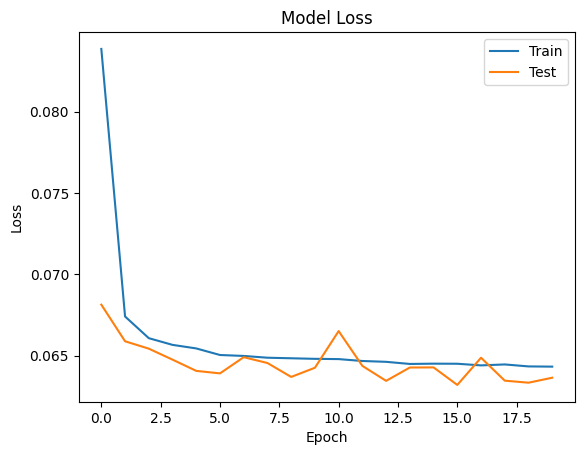

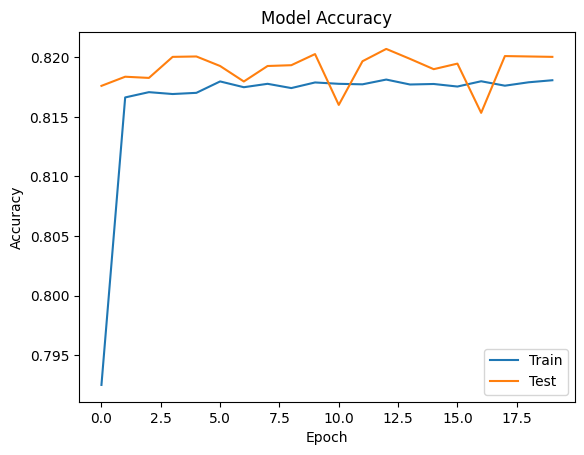

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

938/938 [==============================] - 4s 4ms/step


Text(50.722222222222214, 0.5, 'True labels')

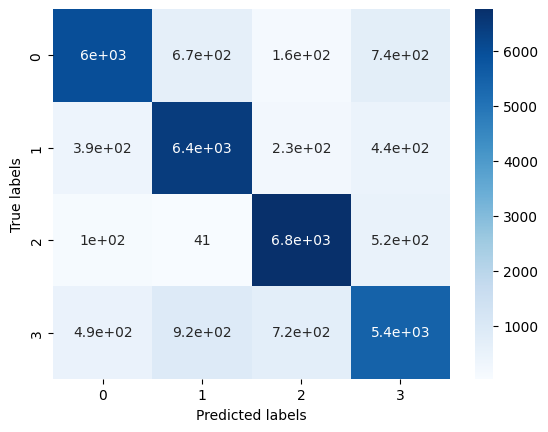

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

FINDINGS: The model was modified with four hidden layers containing 128, 64, 31, and 16 neurons respectively, using the activation function
sigmoid,elu and selu. The validation accuracy of the model was 0.8100, indicating a good fit to the dataset without underfitting or overfitting.
Residual training and testing plots were generated, showing a similar trend to the previous model. The graphs displayed the model loss and
accuracy approaching 0 and 1 respectively, indicating a well-fitting neural network model for the dataset.
However, upon closer examination, it was observed that the exponential testing line in the model loss increased to 0.1 after reaching its
minimum point at the 10th epoch, resulting in a slight loss. Similarly, the exponential testing line in the accuracy model decreased to 0.8181 after
reaching its maximum point at approximately the 7th epoch, indicating a slight error in accuracy.
To evaluate the model's performance, a confusion matrix was plotted. The matrix indicated no type I or type II errors, suggesting good
performance in classifying the dataset.